<a href="https://colab.research.google.com/github/Walkhie/Exploring-Mental-Health-Data/blob/main/2)Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargamos las librerias principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargamos los pipeline
import pickle
from AjustarData import Imputacion, TransformarSueño, TransformarDieta, ReduccionCategorias
from AjustarData import eliminar_variables_irrelevantes,eliminar_outliers

filename1 = 'pipe_preparacion.pkl'
pipe_preparacion = pickle.load(open(filename1, 'rb'))

filename2 = 'pipe_preparacion_norm.pkl'
pipe_preparacion_norm= pickle.load(open(filename2, 'rb'))

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
X = train.drop('Depression', axis=1) #Variables predictoras
y = train['Depression'] #Variable objetivo

In [ ]:
# Aplicamos el pipe y luego lo convertimos en un dataFrame

X_transformed = pipe_preparacion.transform(X)

# Paso 1: Obtén los nombres de columnas
# Columnas numéricas
numeric_cols = ['Age','Academic Pressure', 'Work/Study Hours', 'Financial Stress', 'Work Pressure']

# Columnas categóricas
categorical_cols = ['Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Profession','Degree']
cat_cols = pipe_preparacion.named_steps['Preprocesamiento'].transformers_[1][1].named_steps['dummies'].get_feature_names_out(categorical_cols)

# Combina todos los nombres de columnas
all_cols = list(numeric_cols) + list(cat_cols)

# Paso 3: Convierte el resultado a un DataFrame
# DataFrame Limpio y SIN normalizar
trainClean = pd.DataFrame(X_transformed, columns=all_cols)

# Para mantener los índices originales
trainClean.index = X.index

In [ ]:
trainClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 24 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Age                                        140700 non-null  float64
 1   Academic Pressure                          140700 non-null  float64
 2   Work/Study Hours                           140700 non-null  float64
 3   Financial Stress                           140700 non-null  float64
 4   Work Pressure                              140700 non-null  float64
 5   Dietary Habits_Healthy                     140700 non-null  float64
 6   Dietary Habits_Moderate                    140700 non-null  float64
 7   Dietary Habits_Unhealthy                   140700 non-null  float64
 8   Have you ever had suicidal thoughts ?_Yes  140700 non-null  float64
 9   Profession_Content Writer                  140700 non-null  float64
 10  Professi

In [ ]:
# Aplicamos el pipe con la normalizacion
X_norm = pipe_preparacion_norm.transform(X)

# DataFrame Limpio y Normalizado
trainNorm = pd.DataFrame(X_norm, columns=all_cols)

trainNorm.index = X.index

In [ ]:
trainNorm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 24 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Age                                        140700 non-null  float64
 1   Academic Pressure                          140700 non-null  float64
 2   Work/Study Hours                           140700 non-null  float64
 3   Financial Stress                           140700 non-null  float64
 4   Work Pressure                              140700 non-null  float64
 5   Dietary Habits_Healthy                     140700 non-null  float64
 6   Dietary Habits_Moderate                    140700 non-null  float64
 7   Dietary Habits_Unhealthy                   140700 non-null  float64
 8   Have you ever had suicidal thoughts ?_Yes  140700 non-null  float64
 9   Profession_Content Writer                  140700 non-null  float64
 10  Professi

# **2. Division 70-30**

Datos sin normalizar

<Axes: xlabel='Depression'>

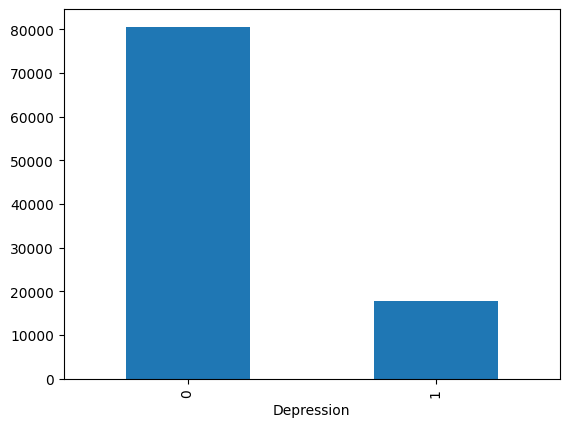

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(trainClean, y, test_size=0.3, stratify=y)
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='Depression'>

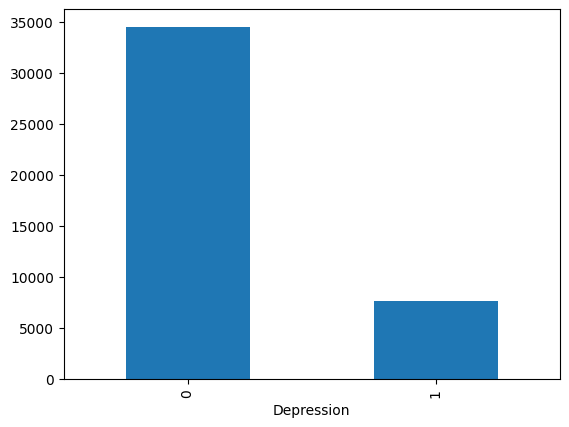

In [ ]:
Y_test.value_counts().plot(kind='bar')

Datos normalizados

<Axes: xlabel='Depression'>

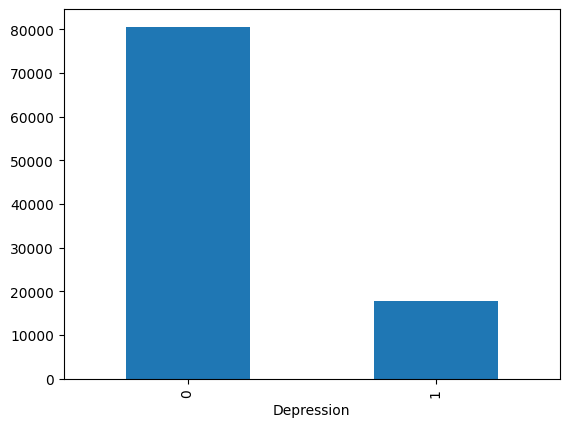

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(trainNorm, y, test_size=0.3, stratify=y)
Y_train_norm.value_counts().plot(kind='bar')

<Axes: xlabel='Depression'>

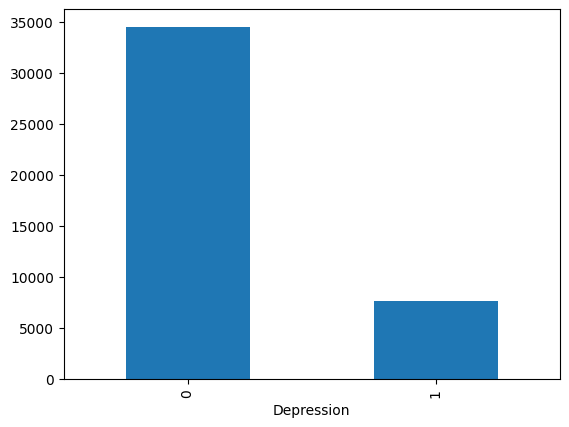

In [ ]:
Y_test_norm.value_counts().plot(kind='bar')

# Balanceo del 70%

Datos sin normalizar

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

<Axes: xlabel='Depression'>

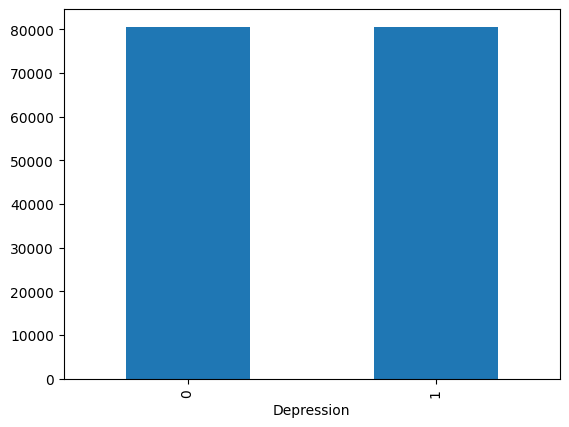

In [ ]:
Y_train.value_counts().plot(kind='bar')

Datos normalizados

In [ ]:
X_train_norm, Y_train_norm = smote.fit_resample(X_train_norm, Y_train_norm)

<Axes: xlabel='Depression'>

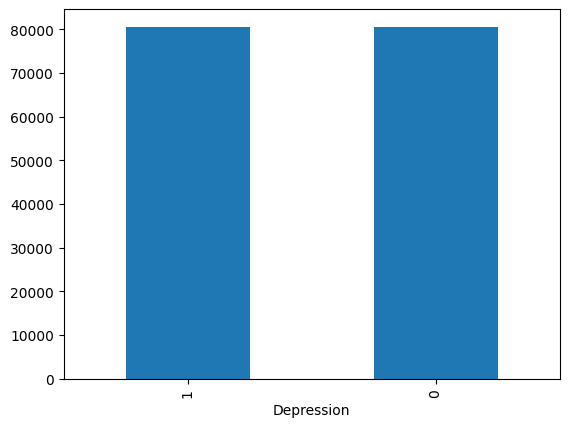

In [ ]:
Y_train_norm.value_counts().plot(kind='bar')

# **Metodos de aprendizaje supervisado para Clasificación**

**Knn**

In [ ]:
#Aprendizaje KNN con 70% usando validacion cruzada
from sklearn.neighbors  import KNeighborsClassifier #KNeighborsRegressor

modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski
#modelKnn.fit(X_train_norm, Y_train_norm) #70%

In [ ]:
from sklearn.model_selection import cross_validate

#Validacion Cruzada: division, aprendizaje, evaluacion
scores_Knn = cross_validate(modelKnn, X_train_norm, Y_train_norm, cv=10, scoring=['f1','accuracy','recall','precision'], return_train_score=True, return_estimator=False,n_jobs=-1)
scores_Knn = pd.DataFrame(scores_Knn)

scores_Knn

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,0.132657,29.897205,0.920209,0.992829,0.920591,0.992865,0.915757,0.987744,0.924706,0.997966
1,0.144653,29.571967,0.920964,0.995527,0.921087,0.995526,0.919479,0.995602,0.922455,0.995451
2,0.085598,28.861862,0.943932,0.993684,0.943111,0.993686,0.957692,0.993465,0.930561,0.993904
3,0.083766,29.006295,0.946210,0.993156,0.945096,0.993162,0.965877,0.992238,0.927329,0.994075
4,0.091864,31.146885,0.946077,0.993008,0.944910,0.993017,0.966621,0.991756,0.926388,0.994264
5,0.081577,31.618816,0.946881,0.992847,0.945902,0.992858,0.964388,0.991314,0.929999,0.994385
6,0.086310,29.067001,0.948634,0.992854,0.947512,0.992865,0.969351,0.991273,0.928784,0.994440
7,0.080308,28.856893,0.945931,0.992928,0.944720,0.992941,0.967118,0.991080,0.925653,0.994783
8,0.087377,29.328824,0.945589,0.992887,0.944472,0.992900,0.965008,0.991039,0.926937,0.994742
9,0.080409,28.132988,0.947317,0.992796,0.946271,0.992810,0.966125,0.990873,0.929228,0.994727


**Red Neuronal**

In [ ]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=3)

#modelNN.fit(X_train_norm, Y_train_norm) #70% normalizados

In [ ]:
from sklearn.model_selection import cross_validate

#Validacion Cruzada: division, aprendizaje, evaluacion
scores_NN = cross_validate(modelNN, X_train_norm, Y_train_norm, cv=10, scoring=['f1','accuracy','recall','precision'], return_train_score=True, return_estimator=False,n_jobs=-1)
scores_NN = pd.DataFrame(scores_NN)

scores_NN


,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,8.424978,0.048904,0.903053,0.912334,0.905639,0.913950,0.878908,0.895523,0.928562,0.929788
1,8.241755,0.046009,0.908991,0.916849,0.907376,0.914970,0.925062,0.937573,0.893469,0.897022
2,6.432694,0.047582,0.917809,0.918038,0.917054,0.917417,0.926179,0.925000,0.909589,0.911181
3,6.413184,0.045372,0.920466,0.918545,0.920342,0.918396,0.921951,0.920217,0.918986,0.916880
4,8.260455,0.044401,0.921830,0.919336,0.921025,0.918576,0.931381,0.927992,0.912473,0.910839
5,10.754220,0.044544,0.922130,0.918513,0.921521,0.917493,0.929396,0.930005,0.914977,0.907302
6,6.800096,0.045631,0.919667,0.917263,0.918600,0.916377,0.931877,0.927082,0.907772,0.907649
7,6.829009,0.111037,0.914480,0.912565,0.915684,0.914054,0.901601,0.897028,0.927732,0.928651
8,8.545518,0.043382,0.917635,0.916792,0.918228,0.917439,0.911031,0.909670,0.924336,0.924027
9,7.655941,0.027096,0.913764,0.911745,0.915064,0.913275,0.899988,0.895938,0.927968,0.928120


**Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()

#modelNB.fit(X_train_norm, Y_train_norm) #70% normalizados

In [ ]:
from sklearn.model_selection import cross_validate

#Validacion Cruzada: division, aprendizaje, evaluacion
scores_NB = cross_validate(model_NB, X_train, Y_train, cv=10, scoring=['f1','accuracy','recall','precision'], return_train_score=True, return_estimator=False,n_jobs=-1)
scores_NB = pd.DataFrame(scores_NB)

scores_NB

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,0.178557,0.059343,0.845060,0.861825,0.846579,0.861430,0.836828,0.864284,0.853455,0.859379
1,0.176087,0.058971,0.846071,0.860775,0.848688,0.860409,0.831741,0.863030,0.860904,0.858532
2,0.166027,0.057192,0.867421,0.859683,0.866927,0.859527,0.870704,0.860631,0.864163,0.858737
3,0.158958,0.059619,0.863253,0.860102,0.862336,0.860037,0.868983,0.860505,0.857598,0.859699
4,0.159209,0.053695,0.862965,0.860241,0.862336,0.860154,0.866873,0.860781,0.859093,0.859702
5,0.152111,0.059136,0.860661,0.860007,0.860289,0.859920,0.862903,0.860546,0.858430,0.859468
6,0.159811,0.053705,0.865834,0.859996,0.865368,0.859852,0.868842,0.860879,0.862847,0.859114
7,0.156642,0.057132,0.865463,0.859883,0.864127,0.859831,0.874054,0.860203,0.857039,0.859564
8,0.169936,0.055934,0.856488,0.860752,0.856186,0.860624,0.858295,0.861541,0.854689,0.859964
9,0.165437,0.059351,0.865953,0.859756,0.865678,0.859611,0.867726,0.860645,0.864187,0.858869


**Regresion Logistica**

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(max_iter=1000)

#modelLR.fit(X_train_norm, Y_train_norm) #70% normalizados

In [ ]:
from sklearn.model_selection import cross_validate

#Validacion Cruzada: division, aprendizaje, evaluacion
scores_LR = cross_validate(model_LR, X_train_norm, Y_train_norm, cv=10, scoring=['f1','accuracy','recall','precision'], return_train_score=True, return_estimator=False,n_jobs=-1)
scores_LR = pd.DataFrame(scores_LR)

scores_LR

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,0.581295,0.045524,0.911419,0.920210,0.911161,0.919513,0.914020,0.928253,0.908833,0.912305
1,0.579499,0.041877,0.911383,0.920274,0.911037,0.919575,0.914888,0.928350,0.907904,0.912338
2,0.563913,0.041727,0.919806,0.919410,0.919040,0.918713,0.928536,0.927357,0.911238,0.911597
3,0.582366,0.044707,0.920703,0.919361,0.919970,0.918658,0.929272,0.927372,0.912291,0.911488
4,0.974743,0.085046,0.920949,0.919320,0.920218,0.918624,0.929520,0.927248,0.912535,0.911527
5,0.756504,0.084147,0.923656,0.918985,0.923196,0.918293,0.929272,0.926834,0.918107,0.911268
6,1.035072,0.090616,0.921944,0.919179,0.921082,0.918493,0.932126,0.926972,0.911983,0.911515
7,0.848260,0.061405,0.922097,0.919179,0.921082,0.918507,0.934111,0.926821,0.910388,0.911663
8,0.990891,0.083656,0.921442,0.919222,0.920648,0.918542,0.930761,0.926958,0.912308,0.911613
9,0.769409,0.080256,0.920196,0.919380,0.919345,0.918700,0.930016,0.927138,0.910582,0.911752


#**Modelos de ensamble**



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=100, max_samples=0.7, criterion = 'gini', max_depth=None, min_samples_leaf=2)

#modelRF.fit(X_train_norm, Y_train_norm) #70% normalizados

In [ ]:
from sklearn.model_selection import cross_validate

#Validacion Cruzada: division, aprendizaje, evaluacion
scores_RF = cross_validate(model_RF, X_train, Y_train, cv=10, scoring=['f1','accuracy','recall','precision'], return_train_score=True, return_estimator=False,n_jobs=-1)
scores_RF = pd.DataFrame(scores_RF)

scores_RF

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,19.962271,0.498757,0.892143,0.976852,0.898567,0.976735,0.839062,0.981802,0.952394,0.971953
1,20.135908,0.494706,0.891597,0.976703,0.898443,0.976563,0.835339,0.982587,0.955978,0.970889
2,24.659228,0.456236,0.960099,0.970727,0.959861,0.970579,0.965877,0.975639,0.954389,0.965865
3,23.122653,0.493421,0.973206,0.969456,0.972579,0.969311,0.995906,0.974067,0.951517,0.964888
4,23.762826,0.568971,0.972072,0.969203,0.971400,0.969056,0.995409,0.973846,0.949805,0.964604
5,24.006623,0.482245,0.971228,0.969319,0.970532,0.969166,0.994665,0.974163,0.948870,0.964523
6,20.549953,0.869035,0.970847,0.969507,0.970158,0.969359,0.993796,0.974191,0.948934,0.964867
7,23.332833,0.946729,0.971775,0.969080,0.971088,0.968918,0.995409,0.974150,0.949237,0.964062
8,20.746310,0.438141,0.972093,0.969610,0.971398,0.969476,0.996277,0.973888,0.949054,0.965370
9,21.253000,0.825149,0.972888,0.969195,0.972267,0.969035,0.995161,0.974233,0.951590,0.964210


**Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8, criterion= 'squared_error', min_samples_leaf=2, max_depth=10)

#modelGB.fit(X_train_norm, Y_train_norm) #70% normalizados

In [ ]:
from sklearn.model_selection import cross_validate

#Validacion Cruzada: division, aprendizaje, evaluacion
scores_GB = cross_validate(model_GB, X_train, Y_train, cv=10, scoring=['f1','accuracy','recall','precision'], return_train_score=True, return_estimator=False,n_jobs=-1)
scores_GB = pd.DataFrame(scores_GB)

scores_GB

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,139.578569,0.345862,0.868664,0.979152,0.879769,0.979127,0.795260,0.980313,0.956996,0.977994
1,137.599526,0.191729,0.869269,0.979259,0.880948,0.979230,0.791661,0.980602,0.963746,0.977919
2,117.120841,0.288157,0.960708,0.972108,0.960605,0.972096,0.963271,0.972523,0.958158,0.971693
3,117.364523,0.344145,0.977066,0.971162,0.976549,0.971144,0.999007,0.971751,0.956067,0.970573
4,117.005993,0.165396,0.975968,0.971231,0.975433,0.971213,0.997643,0.971820,0.955215,0.970642
5,116.601192,0.163227,0.977826,0.970868,0.977356,0.970834,0.998511,0.971999,0.957981,0.969739
6,120.719284,0.172085,0.974387,0.971514,0.973756,0.971489,0.998387,0.972358,0.951514,0.970672
7,119.866277,0.171868,0.976157,0.970827,0.975617,0.970814,0.998263,0.971282,0.955009,0.970373
8,118.002938,0.170784,0.975261,0.971357,0.974687,0.971344,0.997891,0.971765,0.953635,0.970948
9,117.358250,0.165542,0.978535,0.971037,0.978099,0.971014,0.998387,0.971820,0.959456,0.970255


In [ ]:
from sklearn.model_selection import cross_validate

#Validacion Cruzada: division, aprendizaje, evaluacion
scores_GB_norm = cross_validate(model_GB, X_train_norm, Y_train_norm, cv=10, scoring=['f1','accuracy','recall','precision'], return_train_score=True, return_estimator=False,n_jobs=-1)
scores_GB_norm = pd.DataFrame(scores_GB_norm)

scores_GB_norm

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,114.157691,0.313287,0.866331,0.980189,0.878032,0.980182,0.790447,0.980547,0.958333,0.979831
1,115.611593,0.325710,0.868091,0.980117,0.879335,0.980106,0.794045,0.980685,0.957367,0.979550
2,115.731174,0.158094,0.959955,0.972549,0.959923,0.972537,0.960670,0.972978,0.959242,0.972120
3,115.364052,0.182151,0.975355,0.970658,0.974812,0.970641,0.996898,0.971200,0.954724,0.970116
4,114.283807,0.157303,0.976597,0.971431,0.976115,0.971413,0.996774,0.972041,0.957221,0.970823
5,114.087838,0.162130,0.978381,0.970735,0.977976,0.970731,0.996774,0.970869,0.960655,0.970601
6,110.910892,0.157488,0.975530,0.970589,0.974997,0.970566,0.996774,0.971351,0.955172,0.969827
7,112.420608,0.163002,0.974853,0.970834,0.974252,0.970834,0.998139,0.970814,0.952629,0.970854
8,115.407100,0.156082,0.976713,0.970813,0.976238,0.970793,0.996650,0.971489,0.957558,0.970138
9,115.536480,0.118483,0.976208,0.971217,0.975679,0.971207,0.997891,0.971572,0.955447,0.970863


**Voting Hard**

In [ ]:
from sklearn.ensemble import VotingClassifier

clasificadores = [('KNN', modelKnn), ('NN', modelNN), ('LR', model_LR)]

model_vot_hard = VotingClassifier(estimators=clasificadores, voting='hard')

#model_vot_hard.fit(X_train_norm, Y_train_norm) #70% normalizados

In [ ]:
from sklearn.model_selection import cross_validate

#Validacion Cruzada: division, aprendizaje, evaluacion
scores_model_vot_hard = cross_validate(model_vot_hard, X_train, Y_train, cv=10, scoring=['f1','accuracy','recall','precision'], return_train_score=True, return_estimator=False,n_jobs=-1)
scores_model_vot_hard = pd.DataFrame(scores_model_vot_hard)

scores_model_vot_hard

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,20.194821,41.861127,0.921011,0.934558,0.919722,0.933307,0.936096,0.952422,0.906404,0.917352
1,24.631040,43.504930,0.920155,0.931779,0.920715,0.931659,0.913761,0.933411,0.926639,0.930153
2,11.004965,29.491085,0.934141,0.932559,0.932564,0.931287,0.956570,0.950148,0.912740,0.915610
3,10.164141,28.935313,0.930518,0.933587,0.930579,0.934079,0.929653,0.926682,0.931386,0.940596
4,13.198343,29.032744,0.924611,0.930130,0.923072,0.929198,0.943424,0.942537,0.906533,0.918045
5,10.811909,29.381096,0.930478,0.932028,0.928904,0.930866,0.951489,0.947955,0.910375,0.916627
6,11.637160,29.171143,0.931590,0.935799,0.931505,0.936457,0.932746,0.926200,0.930437,0.945599
7,11.543763,28.359033,0.925786,0.929904,0.924184,0.928826,0.945775,0.944205,0.906625,0.916030
8,14.207285,27.031962,0.931112,0.938023,0.931257,0.938780,0.929148,0.926559,0.933084,0.949775
9,13.298270,29.538447,0.933814,0.940071,0.931629,0.938505,0.964636,0.964637,0.904900,0.916725


In [ ]:
from sklearn.model_selection import cross_validate

#Validacion Cruzada: division, aprendizaje, evaluacion
scores_model_vot_hard_norm = cross_validate(model_vot_hard, X_train_norm, Y_train_norm, cv=10, scoring=['f1','accuracy','recall','precision'], return_train_score=True, return_estimator=False,n_jobs=-1)
scores_model_vot_hard_norm = pd.DataFrame(scores_model_vot_hard_norm)

scores_model_vot_hard_norm

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,15.651196,35.081217,0.916833,0.930922,0.917489,0.931059,0.909553,0.929081,0.924231,0.932771
1,15.314911,35.189672,0.917838,0.932783,0.916930,0.931769,0.927916,0.946852,0.907976,0.919126
2,8.399878,28.338751,0.924135,0.926602,0.923320,0.925965,0.933995,0.934650,0.914480,0.918691
3,8.481979,27.839666,0.926694,0.927779,0.926112,0.927330,0.934111,0.933535,0.919394,0.922093
4,9.353040,28.199503,0.926069,0.926135,0.925244,0.925448,0.936469,0.934734,0.915898,0.917692
5,10.963048,30.239544,0.931860,0.932708,0.931137,0.931983,0.941804,0.942744,0.922124,0.922883
6,8.001423,31.626748,0.927531,0.928039,0.926542,0.927379,0.940191,0.936554,0.915207,0.919678
7,6.851879,31.668216,0.928166,0.930537,0.927783,0.930660,0.933118,0.928889,0.923266,0.932191
8,7.037945,44.575878,0.927320,0.929705,0.926914,0.929599,0.932498,0.931108,0.922199,0.928305
9,13.390299,39.017346,0.926428,0.929071,0.926232,0.929192,0.928899,0.927482,0.923969,0.930664
